# TASK 6 - Prediction Using Decision Tree Algorithm

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

from IPython.display import Image

In [3]:
# Load the dataset
iris=datasets.load_iris()
X=pd.DataFrame(iris.data[:, :], columns=iris.feature_names[:])
y=pd.DataFrame(iris.target,columns=["Species"])

print("Showing part of the whole dataset:")
print(X)

Showing part of the whole dataset:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
5                  5.4               3.9                1.7               0.4
6                  4.6               3.4                1.4               0.3
7                  5.0               3.4                1.5               0.2
8                  4.4               2.9                1.4               0.2
9                  4.9               3.1                1.5               0.1
10                 5.4               3.7                1.5               0.2
11                 4.8       

## Common Dataset Exploration

In [5]:
X.shape

(150, 4)

In [6]:
X.duplicated().sum()

1

In [7]:
X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [8]:
X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [9]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

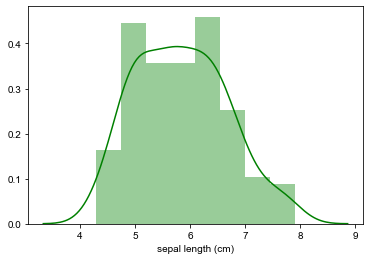

In [11]:
sns.distplot(X['sepal length (cm)'],color="green")
sns.set(rc={'figure.figsize':(7,5)})

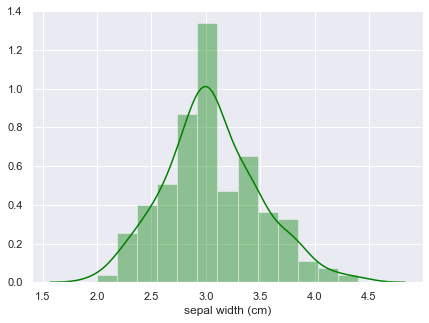

In [12]:
sns.distplot(X['sepal width (cm)'],color="green")
sns.set(rc={'figure.figsize':(7,5)})

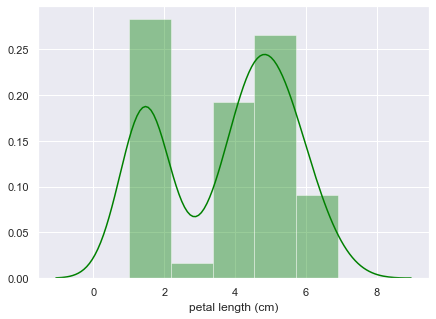

In [13]:
sns.distplot(X['petal length (cm)'],color="green")
sns.set(rc={'figure.figsize':(7,5)})

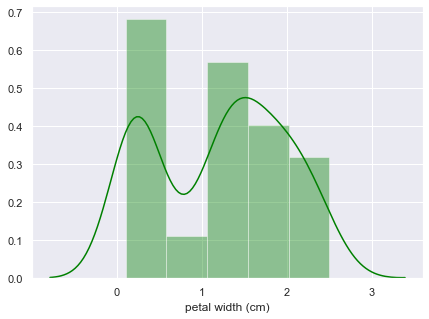

In [14]:
sns.distplot(X['petal width (cm)'],color="green")
sns.set(rc={'figure.figsize':(7,5)})

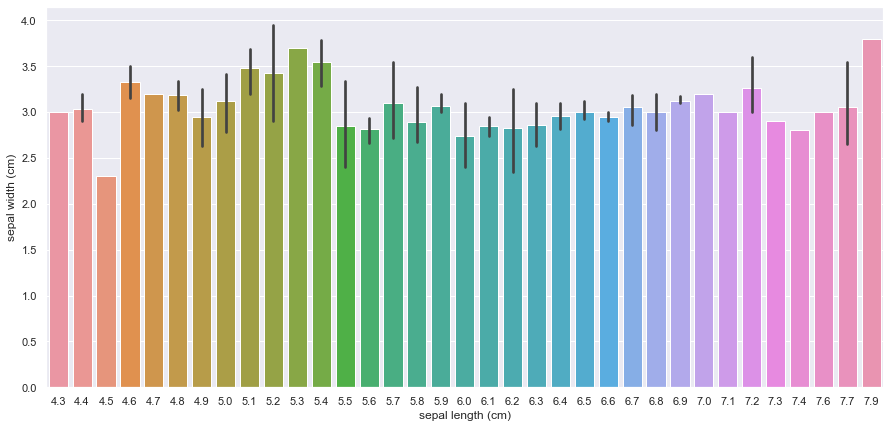

In [15]:
plt.figure(figsize=(15,7))
sns.barplot(X['sepal length (cm)'],X['sepal width (cm)'])

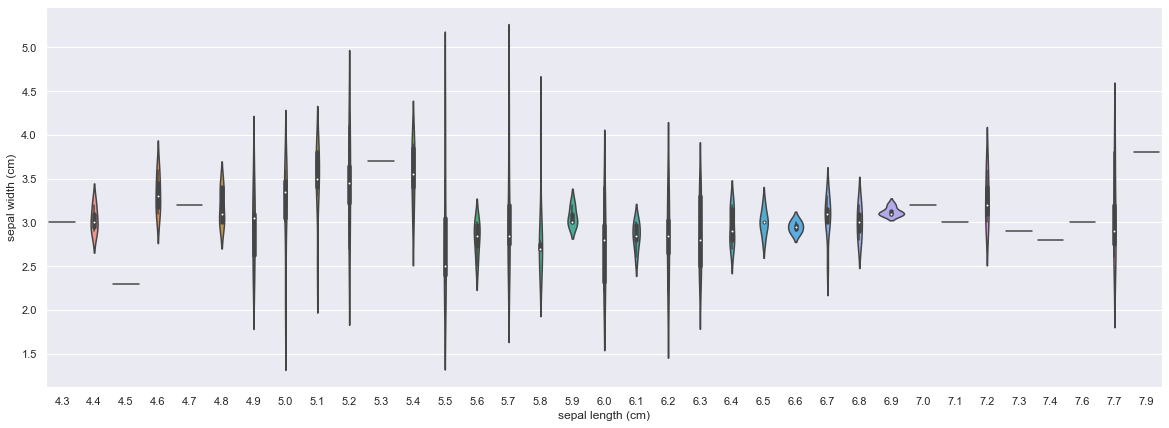

In [16]:
plt.figure(figsize=(20,7))
sns.violinplot(X['sepal length (cm)'],X['sepal width (cm)'])

# Splitting the Dataset

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
X.shape

(150, 4)

In [20]:
y.shape

(150,)

In [21]:
X_train.shape

(100, 4)

In [22]:
y_train.shape

(100,)

In [23]:
X_test.shape

(50, 4)

In [24]:
y_test.shape

(50,)

In [25]:
# Feature scalling
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [26]:
print(X_train)

[[-0.13835603 -0.26550845  0.22229072  0.10894943]
 [ 2.14752625 -0.02631165  1.61160773  1.18499319]
 [-0.25866563 -0.02631165  0.39595535  0.37796037]
 [-0.8602136   1.16967238 -1.39857913 -1.37061074]
 [ 2.26783585 -0.50470526  1.66949594  1.05048772]
 [-0.01804644 -0.74390206  0.16440251 -0.29456698]
 [-0.739904    0.93047557 -1.39857913 -1.37061074]
 [-0.98052319  1.16967238 -1.45646733 -1.23610527]
 [-0.8602136   1.88726279 -1.10913808 -1.1015998 ]
 [-0.98052319 -2.4182797  -0.18292674 -0.29456698]
 [ 0.58350153 -0.74390206  0.62750818  0.78147678]
 [-1.22114238  0.93047557 -1.10913808 -1.37061074]
 [-0.98052319 -0.02631165 -1.28280271 -1.37061074]
 [-0.8602136   0.69127877 -1.2249145  -0.96709433]
 [-0.25866563 -0.74390206  0.22229072  0.10894943]
 [-0.8602136   0.93047557 -1.34069092 -1.37061074]
 [-0.13835603 -0.02631165  0.22229072 -0.02555604]
 [ 2.26783585  1.88726279  1.66949594  1.31949866]
 [-1.46176157  0.45208196 -1.39857913 -1.37061074]
 [ 0.46319194 -0.26550845  0.28

In [27]:
# Create Decision tree classifier object with entropy
dtc=DecisionTreeClassifier(criterion='entropy', random_state=0)

# Train model
model=dtc.fit(X_train,y_train)

print("Decision Tree Classifier Created Successfully")

Decision Tree Classifier Created Successfully


# Predicting a New Value

In [28]:
# Make prediction
y_pred=dtc.predict(X_test)
print("Predicted Values:")
print(y_pred)

Predicted Values:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]


In [29]:
# Calculate accuracy
print("Accuracy Score:", accuracy_score(y_pred,y_test))

Accuracy Score: 0.98


### Constructing Confusion Matrix

In [30]:
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)

In [39]:
import pydotplus
from IPython.display import Image

ModuleNotFoundError: No module named 'pydotplus'